# Logistics Regression (Library）

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.900681          1.019004          -1.340227         -1.315444   
1            -1.143017         -0.131979          -1.340227         -1.315444   
2            -1.385353          0.328414          -1.397064         -1.315444   
3            -1.506521          0.098217          -1.283389         -1.315444   
4            -1.021849          1.249201          -1.340227         -1.315444   
..                 ...               ...                ...               ...   
145           1.038005         -0.131979           0.819596          1.448832   
146           0.553333         -1.282963           0.705921          0.922303   
147           0.795669         -0.131979           0.819596          1.053935   
148           0.432165          0.788808           0.933271          1.448832   
149           0.068662         -0.131979           0.762758          0.790671   

       species  
0       se

C:\Users\Ruopeng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


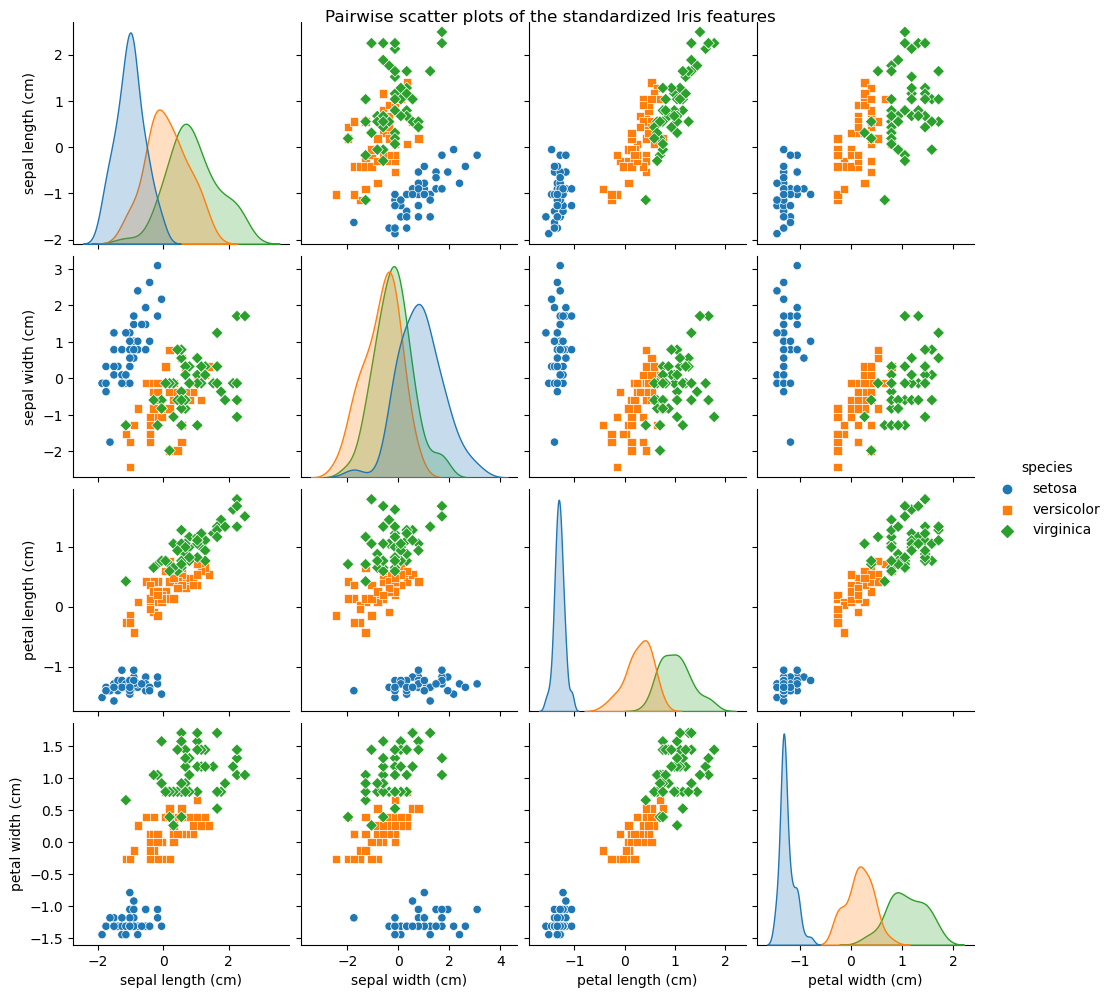

C:\Users\Ruopeng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


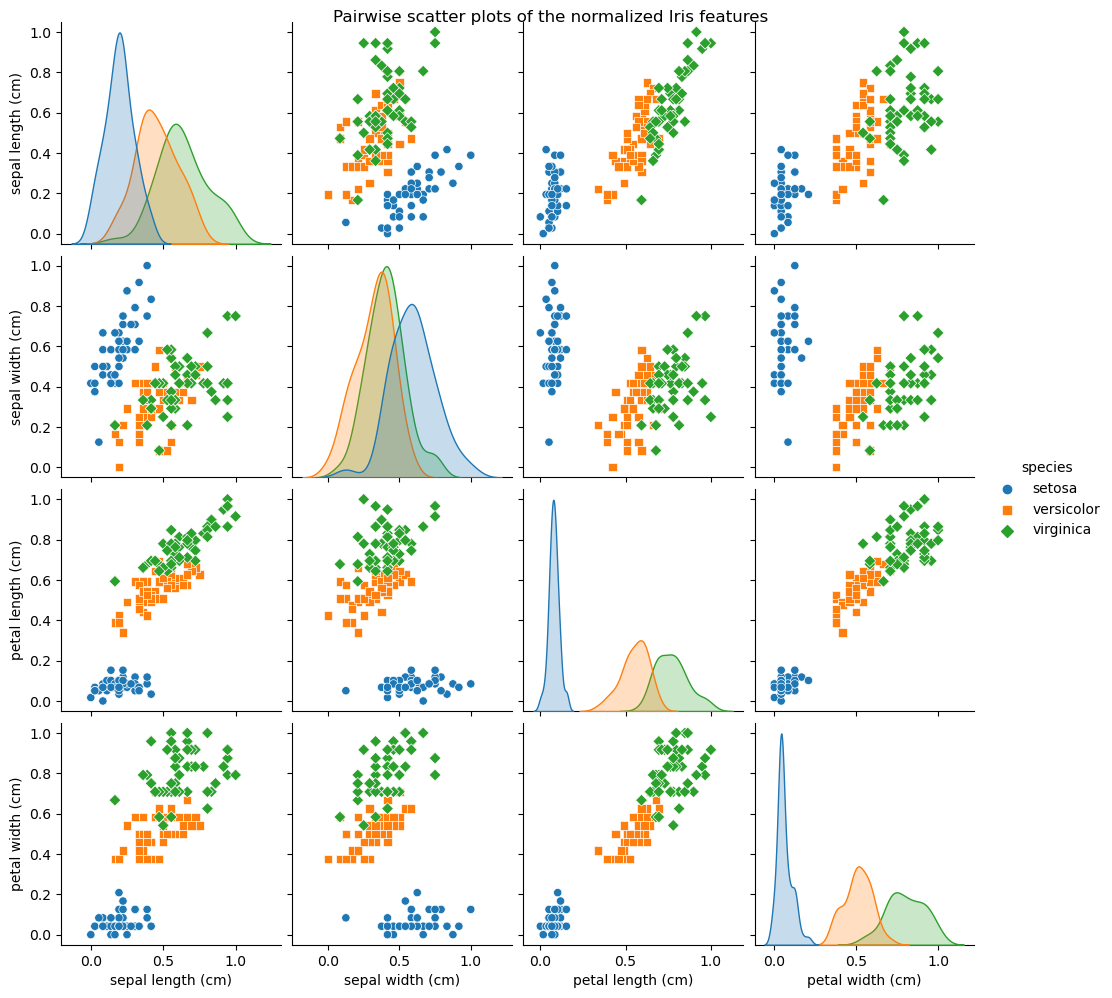

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]
0         setosa
1         setosa
2     

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
#print(df.head())
# Standardization
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_standardized['species'] = df['species']
#print(df_standardized)
# Normalization
scaler_normalize = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_normalize.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_normalized['species'] = df['species']
print(df_standardized)
# Visualize the standardized data
sns.pairplot(df_standardized, hue="species", markers=["o", "s", "D"])
plt.suptitle('Pairwise scatter plots of the standardized Iris features', verticalalignment='bottom')
plt.show()

# Visualize the normalized data
sns.pairplot(df_normalized, hue="species", markers=["o", "s", "D"])
plt.suptitle('Pairwise scatter plots of the normalized Iris features', verticalalignment='bottom')
plt.show()
# Convert labels to one-hot encoding
X = df_standardized.drop('species', axis=1)  # Features
y = df_standardized['species']              # Labels
print(X)
print(y)

Training Accuracy: 0.9619047619047619
Testing Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy scores for each fold: [0.96666667 0.96666667 0.93333333 0.9        1.        ]
Mean accuracy: 0.9533333333333334
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ruopeng\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

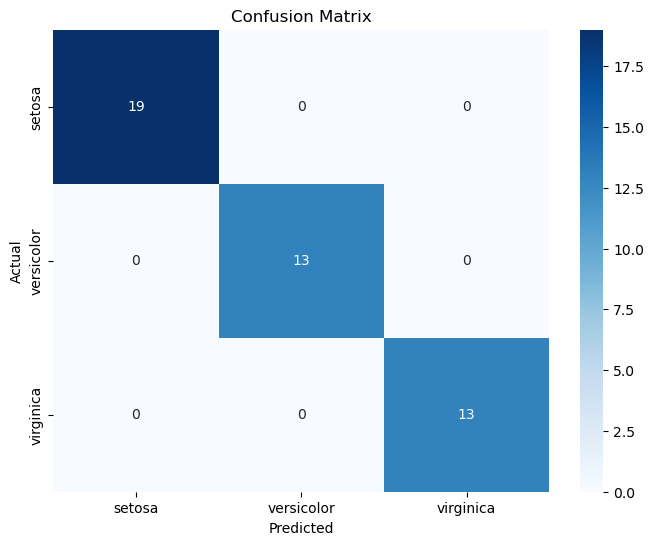

In [2]:

# Split the dataset into training and testing sets
# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
# Standardization improves the convergence of the logistic regression algorithm
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
# Using 'multinomial' for multi-class classification and 'lbfgs' solver which handles multinomial loss
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=8)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Evaluate the model
# Confusion matrix to see the performance of the classification
cm = confusion_matrix(y_test, y_pred_test)

# Classification report for detailed metrics
report = classification_report(y_test, y_pred_test, target_names=iris.target_names)

# Calculate accuracy
train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print out the mean accuracy and the accuracy of each fold
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())

# Print the evaluation results
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()